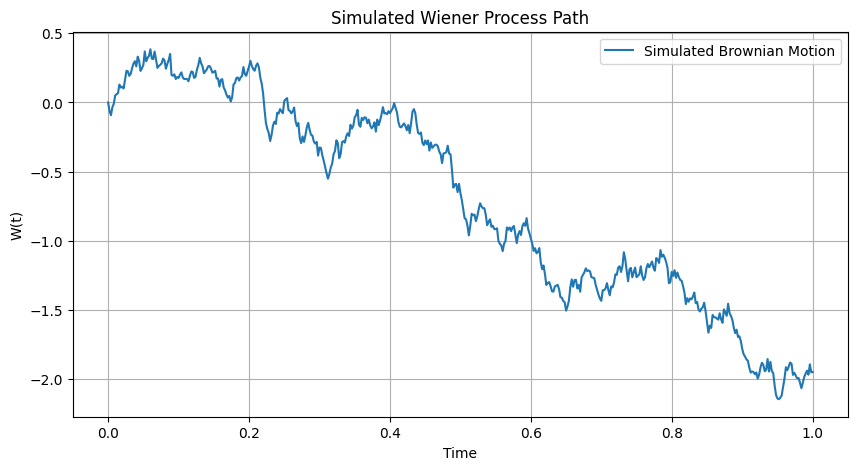

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
total_time = 1.0                 # Time duration [0, T]
num_steps = 500                  # Number of discrete steps
delta_t = total_time / num_steps  # Time step size
time_points = np.linspace(0, total_time, num_steps + 1)  # Time grid

# Initialize Brownian path
brownian_path = np.zeros(num_steps + 1)

# Generate random increments and construct the Brownian motion
random_increments = np.random.normal(0, np.sqrt(delta_t), num_steps)
brownian_path[1:] = np.cumsum(random_increments)  # Cumulative sum of increments

# Plotting the Brownian path
plt.figure(figsize=(10, 5))
plt.plot(time_points, brownian_path, label='Simulated Brownian Motion')
plt.title('Simulated Wiener Process Path')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.legend()
plt.show()


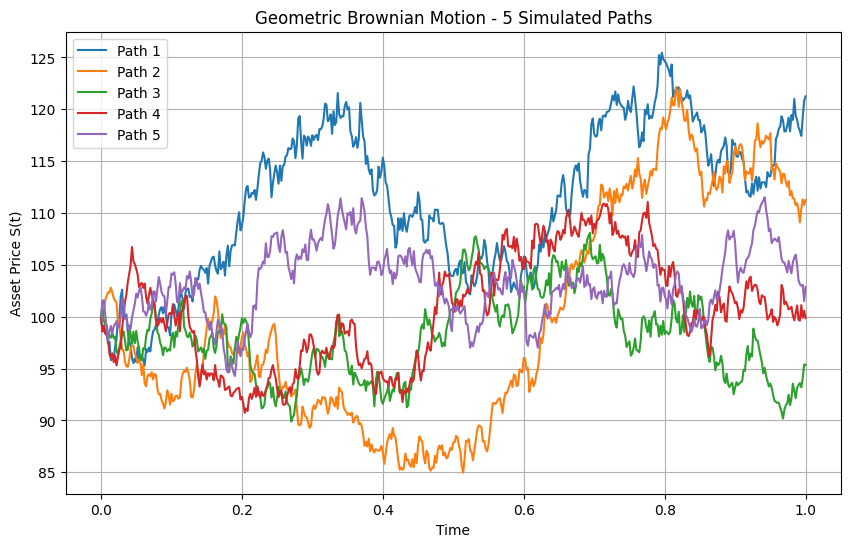

In [4]:
# GBM parameters
initial_price = 100
drift = 0.1
volatility = 0.2
time_horizon = 1.0
num_steps = 500
delta_t = time_horizon / num_steps
time_points = np.linspace(0, time_horizon, num_steps + 1)

# Simulate and store multiple GBM paths
gbm_paths = []

for i in range(5):
    # Generate Brownian motion
    random_increments = np.random.normal(0, np.sqrt(delta_t), num_steps)
    brownian_path = np.insert(np.cumsum(random_increments), 0, 0)  # W(0) = 0

    # Apply GBM formula
    gbm = initial_price * np.exp(volatility * brownian_path +
                                 (drift - 0.5 * volatility**2) * time_points)
    gbm_paths.append(gbm)

# Plotting all 5 paths
plt.figure(figsize=(10, 6))
for i, path in enumerate(gbm_paths):
    plt.plot(time_points, path, label=f'Path {i + 1}')
plt.title('Geometric Brownian Motion - 5 Simulated Paths')
plt.xlabel('Time')
plt.ylabel('Asset Price S(t)')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
# Number of simulations
num_simulations = 100_000
s, t = 0.5, 0.8

# Ensure s <= t for min(s, t)
if s > t:
    s, t = t, s

# Simulate W(s)
W_s = np.random.normal(0, np.sqrt(s), size=num_simulations)

# Simulate W(t) as W(s) + (W(t)-W(s))
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=num_simulations)

# Compute expected value of the product
expected_value = np.mean(W_s * W_t)

print(f"Simulated E[W(s) * W(t)] ≈ {expected_value:.4f}")
print(f"Theoretical value min(s, t) = {min(s, t):.4f}")


Simulated E[W(s) * W(t)] ≈ 0.4956
Theoretical value min(s, t) = 0.5000


In [6]:
# Set times s < t
s, t = 0.4, 1.0
num_simulations = 100_000

# Simulate W(s)
W_s = np.random.normal(0, np.sqrt(s), size=num_simulations)

# Simulate W(t) as W(s) + increment
increment = np.random.normal(0, np.sqrt(t - s), size=num_simulations)
W_t = W_s + increment

# Check distribution of increment
mean_increment = np.mean(increment)
var_increment = np.var(increment)

# Check independence: cov(W(s), W(t) - W(s)) should be 0
covariance = np.cov(W_s, increment)[0, 1]

print(f"Mean of increment W(t) - W(s): {mean_increment:.4f} (Expected: 0)")
print(f"Variance of increment W(t) - W(s): {var_increment:.4f} (Expected: {t - s})")
print(f"Covariance between W(s) and increment: {covariance:.4f} (Should be ≈ 0 if independent)")


Mean of increment W(t) - W(s): -0.0014 (Expected: 0)
Variance of increment W(t) - W(s): 0.5986 (Expected: 0.6)
Covariance between W(s) and increment: -0.0009 (Should be ≈ 0 if independent)


In [7]:
# Set time points s < t
s, t = 0.5, 1.0
num_simulations = 100_000

# Simulate W(s)
W_s = np.random.normal(0, np.sqrt(s), size=num_simulations)

# Simulate W(t) using W(s)
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=num_simulations)

# The conditional expectation E[W(t) | F_s] should be W(s)
expected_difference = np.mean(W_t - W_s)

print(f"Average of W(t) - W(s): {expected_difference:.4f} (Expected: 0)")
print("Hence, E[W(t) | F_s] = W(s) ⇒ Brownian motion is a martingale.")


Average of W(t) - W(s): 0.0052 (Expected: 0)
Hence, E[W(t) | F_s] = W(s) ⇒ Brownian motion is a martingale.
